# __Robot Aspiradora__

In [ ]:
from IPython.display import display
import ipywidgets as widgets
import time

class Tablero:
  def __init__(self, tamano_celda=(50, 50), n_celdas=(5,5)):
    self.out = widgets.HTML()
    display(self.out)
    self.tamano_celda = tamano_celda
    self.n_celdas = n_celdas

  def dibujar(self, objetos):
    tablero = "<table border='1' >{}</table>"
    filas = ""

    for i in range(self.n_celdas[0]):
      s = ""
      for j in range(self.n_celdas[1]):
        contenido =""
        for o in objetos:
          if o.x == j and o.y == i:
            contenido = \
            "<div style='transform: rotate({angulo}deg);font-size:{tamano_emoticon}px;'>{emoticon}</div>".\
            format(angulo = o.angulo, tamano_emoticon = o.tamano_emoticon, emoticon = o.emoticon)
        s += "<td style='height:{alto}px;width:{ancho}px'>{contenido}</td>".\
          format(alto = self.tamano_celda[0], ancho = self.tamano_celda[1],
                contenido = contenido)
      filas += "<tr>{}</tr>".format(s)
    tablero = tablero.format(filas)
    self.out.value = tablero

In [ ]:
import random
class Agente:
  def __init__(self, x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30, tam=(5,5), energia=10,basuras=[]):
    self.x = x
    self.y = y
    self.angulo = angulo
    self.emoticon = emoticon
    self.tamano_emoticon = tamano_emoticon
    self.energia = energia
    self.basuras = basuras

  #punto 2
  def avanzar(self):
    if self.angulo == 0:
      if self.y < alto-1 : self.y += 1
    elif self.angulo == 90:
      if self.x < ancho-1 : self.x +=1
    elif self.angulo == 180:
      if self.y > 0 : self.y -=1
    elif self.angulo == 270:
      if self.x > 0 : self.x -=1
    self.energia -= 1
    #return self.energia

  # giros
  def girar_90(self):
    self.angulo = 90
  def girar_180(self):
    self.angulo = 180
  def girar_270(self):
    self.angulo = 270
  def girar_0(self):
    self.angulo = 0
  #punto 4
  def aspirar(self):
    self.energia -= 1
    self.basuras[self.x][self.y] = 0
  #punto 6
  def percibir(self):
    # posición del robot self.x, self.y
    yn=self.y+1 if self.y+1<alto else self.y
    xn=self.x+1 if self.x+1<ancho else self.x
    #xn=self.x+1
    #print(self.basuras)
    if self.basuras[self.x][self.y]==1:
      #print("hay basura en la posición actual")
      self.aspirar()
      return self.basuras
    elif self.basuras[self.x][self.y-1]==1 and (self.y-1)>0:
      #print("hay basura en la posición de arriba angulo=0")
      self.girar_180()
      self.energia -= 1

    elif self.basuras[self.x][yn]==1 and (self.y+1)<(alto):
      #print("hay basura en la posición de abajo angulo=180")
      self.girar_0()
      self.energia -= 1
      #return self.basuras
    elif self.basuras[self.x-1][self.y]==1 and (self.x-1)>0:
      #print("hay basura en la posición de la izquierda angulo=270")
      self.girar_270()
      self.energia -= 1
      #return self.basuras
    elif self.basuras[xn][self.y]==1 and (self.x+1)<(ancho):
      #print("hay basura en la posición de la derecha angulo=90")
      self.girar_90()
      self.energia -= 1
      #return self.basuras
    else:
      #print('no hay basuras')
      #print(self.x,self.y)
      opc=random.choice([0,3])
      if self.x==0 and self.y==alto-1:
        self.girar_180()
        self.avanzar()
        self.avanzar()
        self.girar_90()
        self.avanzar()
        self.avanzar()
        self.avanzar()
        self.avanzar()
        self.girar_180()
        self.avanzar()
        self.avanzar()
        #print('avanzar')
      elif opc==0:
        self.girar_0()
      elif opc==1:
        self.girar_90()
      elif opc==2:
        self.girar_180()
      else:
        self.girar_270()
    return self.basuras




In [ ]:
import random

# punto 1
bas=[]
en=[]
for i in range(50):
    ancho = 6 #int(input('Proporcione el ancho del ambiente: '))
    alto = 6 #int(input('Proporcione el alto del ambiente: '))
    pos_bas1=(5,3)
    pos_bas2=(3,3)
    pos_bas3=(3,2)

    grid_basuras = []
    for i in range(ancho):
      fila = [random.choice([0,1]) for _ in range(alto)]
      grid_basuras.append(fila)

    #print(grid_basuras)
    suma=0
    for i in range(len(grid_basuras)):
      for j in range(len(grid_basuras[0])):
        suma+=grid_basuras[i][j]
    bas.append(suma)

    #punto 3
    energia = 1000
    pos_x = 4
    pos_y = 3

    agente = Agente(pos_x,pos_y,tamano_emoticon=30,tam=(ancho,alto), energia=energia, basuras=grid_basuras)
    objetos = []
    for i in range(len(grid_basuras)):
      for j in range(len(grid_basuras[0])):
        if grid_basuras[i][j]==1:
          basura=Agente(i,j,0,emoticon="🍂", tamano_emoticon=30)
          objetos.append(basura)

    objetos.append(agente)


    escenario = Tablero(n_celdas=(ancho,alto))
    escenario.dibujar(objetos)
    time.sleep(1)
    agente.girar_270()

    #punto 4 y 5
    while agente.energia>0:
      escenario.dibujar(objetos)
      grid_basuras = agente.percibir()
      #time.sleep(0.2)
      agente.avanzar()
      objetos = []
      for i in range(len(grid_basuras)):
        for j in range(len(grid_basuras[0])):
          if grid_basuras[i][j]==1:
            basura=Agente(i,j,0,emoticon="🍂", tamano_emoticon=30)
            objetos.append(basura)
      objetos.append(agente)
      suma=0
      for i in range(len(grid_basuras)):
        for j in range(len(grid_basuras[0])):
          suma+=grid_basuras[i][j]
      if suma==0:
        break
    en.append(energia-agente.energia)


HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

In [ ]:
print(bas)
print(en)

[16, 22, 20, 17, 20, 21, 16, 15, 24, 22, 10, 15, 20, 14, 18, 17, 13, 12, 17, 10, 14, 19, 17, 17, 21, 22, 18, 20, 14, 14, 19, 12, 19, 15, 16, 22, 18, 14, 18, 18, 22, 15, 19, 24, 26, 19, 17, 18, 22, 16]
[197, 117, 191, 811, 214, 412, 947, 180, 114, 144, 1000, 117, 89, 359, 961, 96, 116, 85, 80, 921, 117, 97, 93, 249, 170, 116, 294, 197, 436, 232, 100, 242, 176, 80, 93, 216, 83, 707, 113, 160, 196, 542, 387, 128, 151, 161, 135, 57, 94, 102]


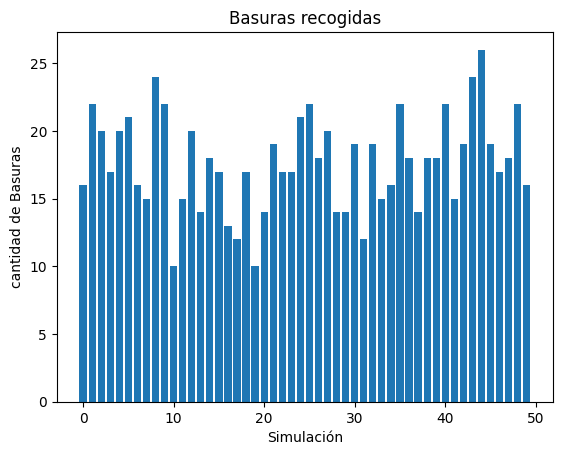

In [ ]:
import matplotlib.pyplot as plt
plt.bar(list(range(len(bas))),bas)
plt.title("Basuras recogidas con Agente reflexivo")
plt.xlabel('Simulación')
plt.ylabel('cantidad de Basuras')
plt.show()

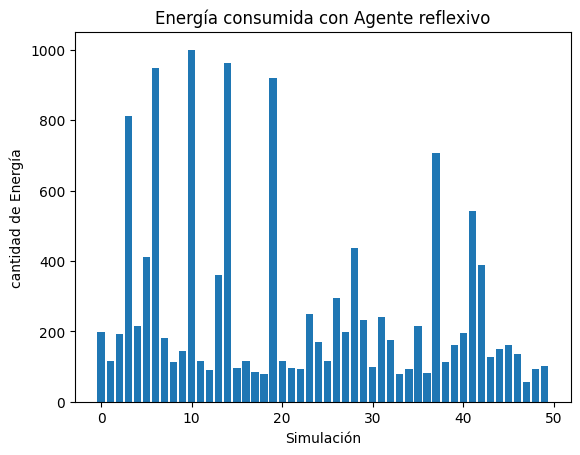

In [ ]:
plt.bar(list(range(len(en))),en)
plt.title("Energía consumida con Agente reflexivo")
plt.xlabel('Simulación')
plt.ylabel('cantidad de Energía')
plt.show()